# Source Detector Separation and Efficiency of GM Tube
- To calculate and graph the relationship between the slot number and the ratio of counts at each slot over the number of counts at slot 6 for an Am-241 and Sr-90 source.
- To calculate the $\beta$ and $\gamma$ efficiency of the GM counter using Cs-137 and Sr-90

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [36]:
slot = np.linspace(6, 1, num = 6)

# Am-241
Am_data = np.genfromtxt('exp4a_Am241.tsv', skip_header = 11)
Am_counts = Am_data[:,2] # counts at different slots (indescending order from 6 to 1)

#arrays of zero
Am_mean = np.zeros(6)
Am_delta = np.zeros(6)

#for loop to calculate the mean and uncertainty of the counts at each slot
for n in [0,2,4,6,8,10]: 
    Am_mean[int(n/2)] = (Am_counts[n]+Am_counts[n+1])/2 # mean
    Am_delta[int(n/2)] = np.abs(Am_counts[n]-Am_counts[n+1])/2 # uncertainty

print(Am_mean, Am_delta)

# find ratios and uncertainty of the ratios
Am_ratio = Am_mean/Am_mean[0] # ratios with respect to slot 6 counts
Am_ratio_delta = Am_ratio*((Am_delta/Am_mean)+(Am_delta[0]/Am_mean[0])) 
# uncertainty of the ratio. Addition since the variables are dependent

# Sr-90
Sr_data = np.genfromtxt('exp4a_Sr90.tsv', skip_header = 11)
Sr_counts = Sr_data[:,2] # counts at different slots (indescending order from 6 to 1)

#array of zeros
Sr_mean = np.zeros(6)
Sr_delta = np.zeros(6)

#for loop to calculate the mean and uncertainty of the counts at each slot
for n in [0,2,4,6,8,10]:
    Sr_mean[int(n/2)] = (Sr_counts[n]+Sr_counts[n+1])/2 # mean
    Sr_delta[int(n/2)] = np.abs(Sr_counts[n]-Sr_counts[n+1])/2 # uncertainty

print(Sr_mean, Sr_delta)

# find ratios and uncertainty of the ratios
Sr_ratio = Sr_mean/Sr_mean[0] # ratios with respect to slot 6 counts
Sr_ratio_delta = Sr_ratio*((Sr_delta/Sr_mean)+(Sr_delta[0]/Sr_mean[0])) 
# uncertainty of the ratio. Addition since the variables are dependent

[7091.  2128.    97.5   45.    32.5   25. ] [75.  24.   9.5  1.   5.5  7. ]
[3955.  2720.5 1922.5 1096.   662.   504. ] [25.  32.5 12.5  8.   5.   8. ]


In [37]:
Am_fit = np.polyfit(slot, np.log(Am_ratio), 1)
print(Am_fit)

Sr_fit = np.polyfit(slot, np.log(Sr_ratio), 1)
print(Sr_fit)

[ 1.18733749 -7.7529045 ]
[ 0.43150496 -2.54801109]


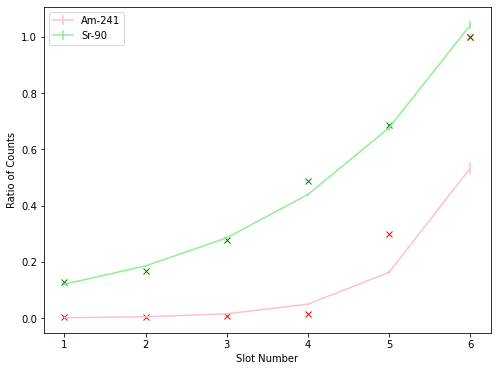

In [46]:
# plot the curves

plt.figure(figsize=(8, 6))
plt.plot(slot, Am_ratio, 'x', color = 'r')
plt.errorbar(slot, np.exp(Am_fit[1])*np.exp(Am_fit[0])**slot, yerr=Am_ratio_delta,color='pink', label = 'Am-241')
plt.plot(slot, Sr_ratio, 'x', color = 'g')
plt.errorbar(slot, np.exp(Sr_fit[1])*np.exp(Sr_fit[0])**slot, yerr=Sr_ratio_delta, color='lightgreen', label = 'Sr-90')
plt.xlabel("Slot Number")
plt.ylabel("Ratio of Counts")
plt.legend(loc='best')
plt.show()

In [66]:
# distance data and urface area
d = 0.06 # source-detector distance is 60 mm
dia = 0.029 # tube window diameter is 29 mm
sa = 4*np.pi*d**2 # surface area of a sphere at 60 mm
area = np.pi*(dia/2)**2 # area of the GM tube's window

# find the mean count and uncertainty for Cs-137
Cs137 = [296, 285, 310] # data
Cs137_mean = sum(Cs137)/3 # mean number of counts
Cs137_delta = (max(Cs137)-min(Cs137))/2
print(Cs137_mean, Cs137_delta)

# find the mean count and uncertainty for Sr-90
Sr90 = [2786, 2818, 2858] # data
Sr90_mean = sum(Sr90)/3 # mean number of counts
Sr90_delta = (max(Sr90)-min(Sr90))/2
print(Sr90_mean, Sr90_delta)

# number of radiation particles passing through the detector
# calculated using the inverse square law
Cs137_part = 0.85*222000*area/sa # only 85% give gamma radiation
Sr90_part = 74000*area/sa

# calculate efficiency
Cs137_eff = 100*Cs137_mean/Cs137_part # gamma efficiency of  GM counter
Sr90_eff = 100*Sr90_mean/Sr90_part # beta efficiency of GM counter
print(Cs137_eff, Sr90_eff)

297.0 12.5
2820.6666666666665 36.0
10.77980827578645 261.0637272230613
